# 911 Calls Capstone Project

For this capstone project we will be analyze some 911 call data from Kaggle. The data contains the following fields:
        
        •	lat: String variable, Latitude
        •	Ing: String variable, Longitude
        •	desc: String variable, Description of the Emergency Gall
        •	zip: String variable, Zipcode
        •	title: String variable, Title
        •	timeStamp: String variable, YYYY-MM-00 HH:MM:SS
        •	twp: String variable, Township
        •	addr: String variable, Address
        •	e: String variable, Dummy variable(always 1)

## Data and Setup

#### Import numpy and pandas

In [4]:
import numpy as np
import pandas as pd

#### Import visualization libraries and set %matplotlib inline

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Read in the csv file as a dataframe called df

In [6]:
data = pd.read_csv('G:\\ML & AI 99DaysWithCPC\\911 Calls Project\\911.csv')

#### Check the info() of the dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


#### Check the head of df

In [8]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


#### Find out the top 5 zipcode for 911 calls

In [9]:
data['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

#### Find out the top 5 townships(twp) for 911 calls

In [10]:
data['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

#### Take a look at the 'title' column, find how many unique title codes there

In [11]:
data['title'].nunique()

110

## Creating new features

#### In the titles column there are "Reasons/Departments" specified before the title code. These are EMS,Fire,and Traffic.Use.apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.

#### For example,if the title column value is EMS:BACK PAINS/INJURY ,the Reason column value would be EMS.

In [12]:
x = data['title'].iloc[0]

In [12]:
x

'EMS: BACK PAINS/INJURY'

In [14]:
x.split(':')[0]

'EMS'

In [15]:
data['Reason'] = data['title'].apply(lambda title:title.split(':')[0])

In [16]:
data['Reason']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: Reason, Length: 99492, dtype: object

#### Find out most common Reason for a 911 call based off of this new column

In [17]:
data['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

#### Now use seaborn to create a countplot of 911 calls by Reason

<Axes: xlabel='Reason', ylabel='count'>

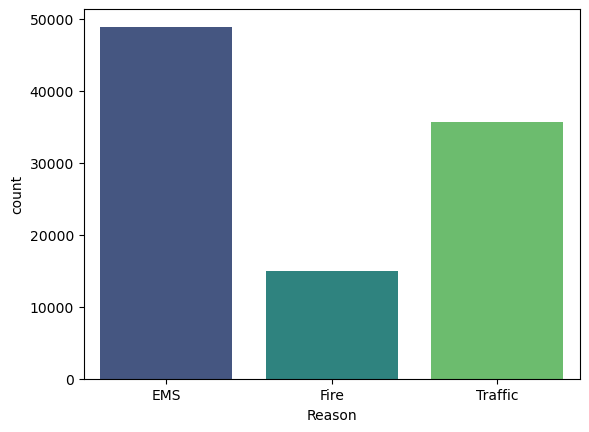

In [18]:
sns.countplot(x='Reason',data = data, palette='viridis')

#### Now let us begin to focus on time information. Find out the data type of the objects in thr timeStamp column

In [19]:
type(data['timeStamp'].iloc[0])

str

#### You should have seen that these timestamps are still strings. Use pandas datetime function to convert the column from stings to DateTime objects

In [20]:
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [21]:
type(data['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

#### apply() to create 3 new columns called Hours, Month, and day of week. These column will create based of the timeStamp column.

In [22]:
data['timeStamp'].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [23]:
data['timeStamp'].iloc[0].hour

17

In [24]:
time = data['timeStamp'].iloc[0]
time.hour

17

In [25]:
time.year

2015

In [26]:
time.month

12

In [27]:
time.day

10

In [28]:
time.minute

40

In [29]:
time.dayofweek

3

#### dayMap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [30]:
data['Hour'] = data['timeStamp'].apply(lambda time: time.hour)

In [31]:
data['Hour']

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: Hour, Length: 99492, dtype: int64

In [32]:
data['Month'] = data['timeStamp'].apply(lambda time: time.month)

In [33]:
data['Month']

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: Month, Length: 99492, dtype: int64

In [34]:
data['DayOfWeek'] = data['timeStamp'].apply(lambda time: time.dayofweek)

In [35]:
data['DayOfWeek']

0        3
1        3
2        3
3        3
4        3
        ..
99487    2
99488    2
99489    2
99490    2
99491    2
Name: DayOfWeek, Length: 99492, dtype: int64

In [36]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


#### Notice how are Day of week is an integer 0-6. Use the map() with this dictionary to map the actual string names to the day of th week.

In [37]:
dayMap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [38]:
data['DayOfWeek'] = data['DayOfWeek'].map(dayMap)

In [39]:
data['DayOfWeek']

0        Thu
1        Thu
2        Thu
3        Thu
4        Thu
        ... 
99487    Wed
99488    Wed
99489    Wed
99490    Wed
99491    Wed
Name: DayOfWeek, Length: 99492, dtype: object

In [40]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


#### Now use seaborn to create a countplot of the Day of Week column with the hue based of the Reason column

<Axes: xlabel='Reason', ylabel='count'>

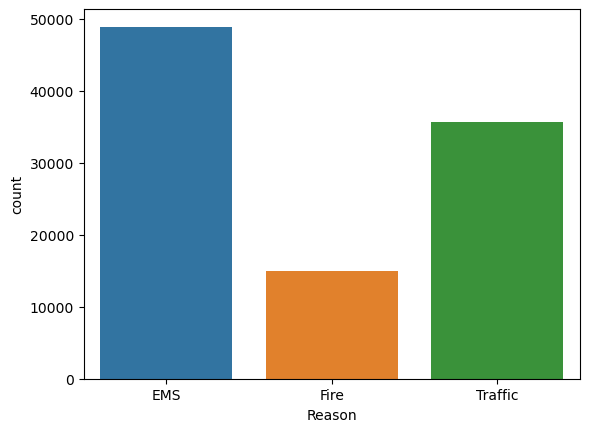

In [41]:
sns.countplot(x='Reason', data=data)

<Axes: xlabel='DayOfWeek', ylabel='count'>

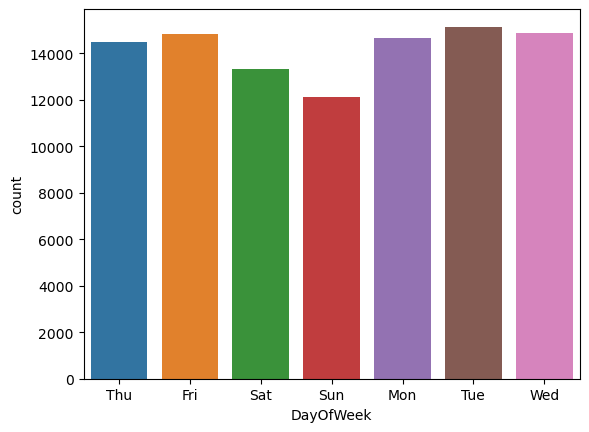

In [42]:
sns.countplot(x='DayOfWeek', data = data)

<Axes: xlabel='DayOfWeek', ylabel='count'>

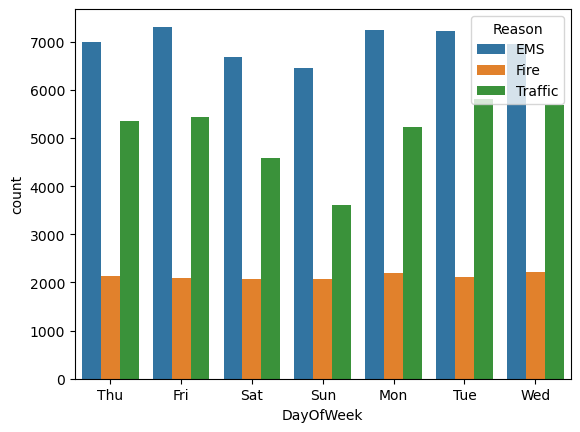

In [43]:
sns.countplot(x='DayOfWeek', data = data, hue='Reason')

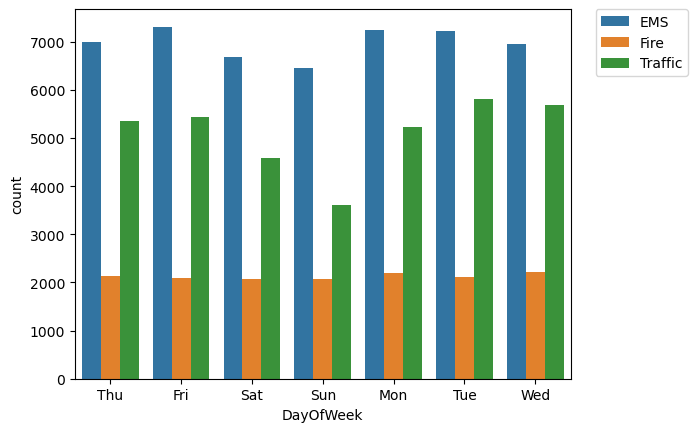

In [44]:
sns.countplot(x='DayOfWeek', data = data, hue='Reason')
# to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#### Now do the same for Month

<Axes: xlabel='Reason', ylabel='count'>

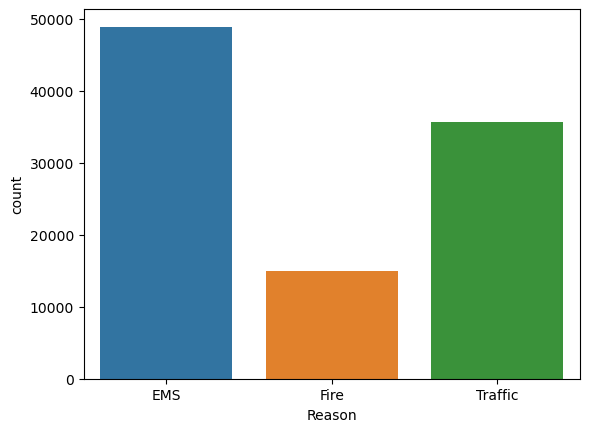

In [45]:
sns.countplot(x='Reason', data=data)

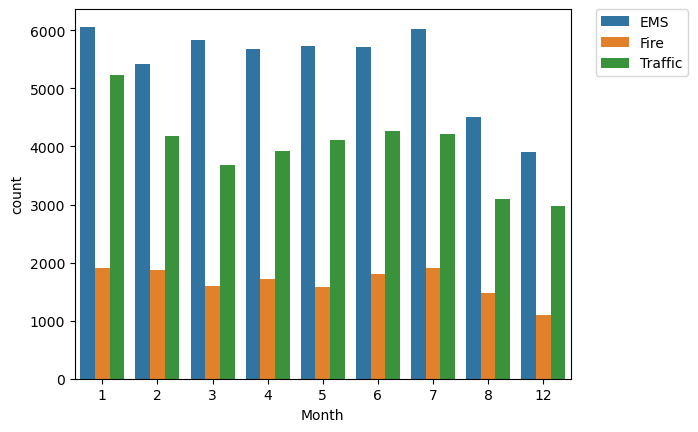

In [46]:
sns.countplot(x='Month', data = data, hue='Reason')
# to relocate the legend
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

#### You should have noticed it was missing some Months, let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that files in the fills in the missing months, in order to do this, we'll need to do some work with pandas...

In [47]:
byMonth = data.groupby('Month').count()

In [48]:
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


#### Now create simple plot off of the dataframe indicating the count of calls per month

<Axes: xlabel='Month'>

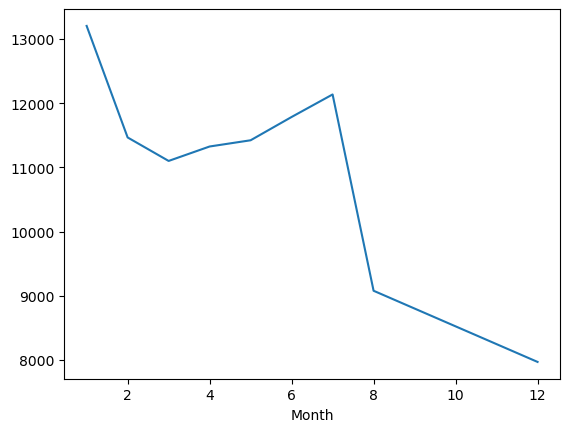

In [49]:
byMonth['lat'].plot()

<Axes: xlabel='Month', ylabel='count'>

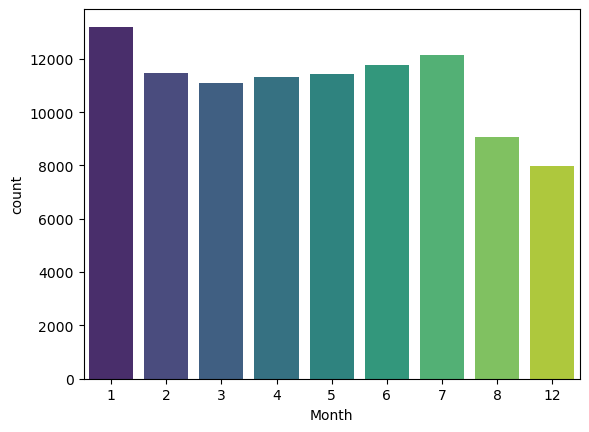

In [52]:
sns.countplot(x='Month', data = data, palette='viridis')

#### Now see if can use seaborn's Implot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column

In [58]:
bymonth = byMonth.reset_index()

In [59]:
bymonth

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayOfWeek
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


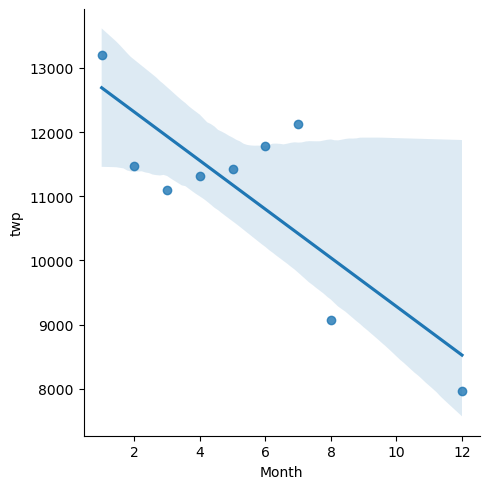

In [60]:
sns.lmplot(x = 'Month', y = 'twp', data=bymonth)

#### Create a new column called 'Date' that contains the date from the timeStamp column. You'ill need to use apply along with th date() method

In [61]:
t = data['timeStamp'].iloc[0]

In [62]:
t

Timestamp('2015-12-10 17:40:00')

In [63]:
t.date()

datetime.date(2015, 12, 10)

In [70]:
data['Date'] = data['timeStamp'].apply(lambda t: t.date())

In [71]:
data['Date']

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: Date, Length: 99492, dtype: object

In [72]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


#### Now groupby the Date column with the count() aggregate and create a plot of counts of 911 calls.

In [73]:
data.groupby('Date').count().head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,DayOfWeek
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


In [74]:
data.groupby('Date').count()['lat']

Date
2015-12-10    115
2015-12-11    396
2015-12-12    403
2015-12-13    319
2015-12-14    447
             ... 
2016-08-20    328
2016-08-21    357
2016-08-22    389
2016-08-23    439
2016-08-24    132
Name: lat, Length: 259, dtype: int64

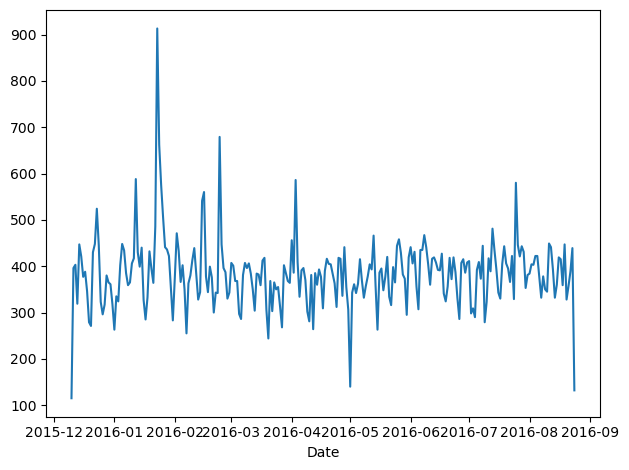

In [76]:
data.groupby('Date').count()['lat'].plot()
plt.tight_layout()

#### Now recreate this plot but create 3 sparate plots with each plot repressenting a Reason for 911 calls

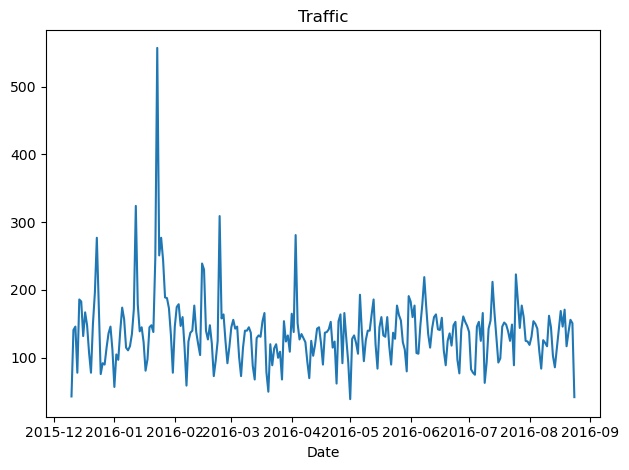

In [82]:
data[data['Reason']=='Traffic'].groupby('Date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

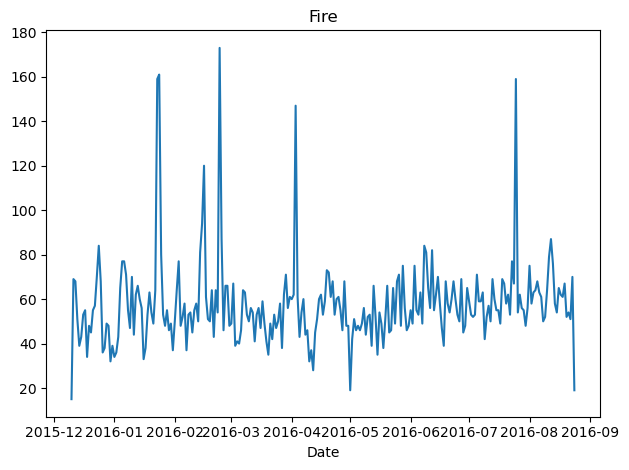

In [83]:
data[data['Reason']=='Fire'].groupby('Date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

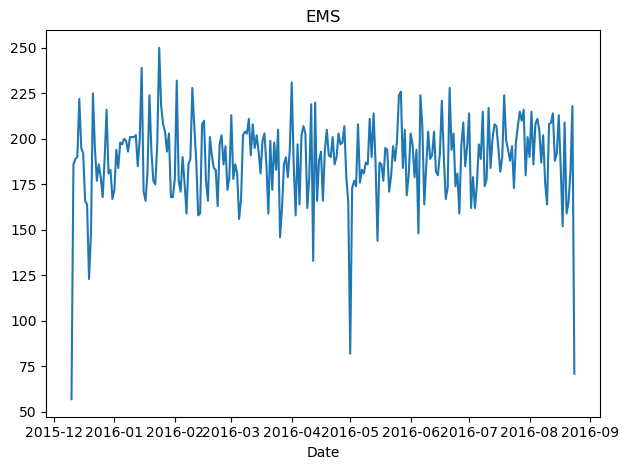

In [84]:
data[data['Reason']=='EMS'].groupby('Date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

#### Now let's move on to creating heatmaps with seaborn and our data. We'll first need to restruct the dataframe so that the clumns become the Hours and the index becomes the Day of the week. Try with unstack method

In [85]:
data.groupby(by=['DayOfWeek','Hour']).count()

lat  lng  desc  zip  title  timeStamp  twp  addr    e  Reason  \
DayOfWeek Hour                                                                  
Fri       0     275  275   275  248    275        275  275   275  275     275   
          1     235  235   235  200    235        235  235   232  235     235   
          2     191  191   191  165    191        191  191   191  191     191   
          3     175  175   175  164    175        175  175   175  175     175   
          4     201  201   201  184    201        201  201   201  201     201   
...             ...  ...   ...  ...    ...        ...  ...   ...  ...     ...   
Wed       19    686  686   686  590    686        686  686   682  686     686   
          20    668  668   668  597    668        668  668   662  668     668   
          21    575  575   575  508    575        575  574   572  575     575   
          22    490  490   490  432    490        490  490   485  490     490   
          23    335  335   335  294    335        335  334   335  335     335   

                Month  Date  
DayOfWeek Hour               
Fri       0       275   275  
          1       235   235  
          2       191   191  
          3       175   175  
          4       201   201  
...               ...   ...  
Wed       19      686   686  
          20      668   668  
          21      575   575  
          22      490   490  
          23      335   335  

[168 rows x 12 columns]

In [86]:
data.groupby(by=['DayOfWeek','Hour']).count()['Reason']

DayOfWeek  Hour
Fri        0       275
           1       235
           2       191
           3       175
           4       201
                  ... 
Wed        19      686
           20      668
           21      575
           22      490
           23      335
Name: Reason, Length: 168, dtype: int64

In [87]:
data.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


#### Now create a Heatmap using this new DataFrame

In [88]:
dayHour = data.groupby(by=['DayOfWeek','Hour']).count()['Reason'].unstack()

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

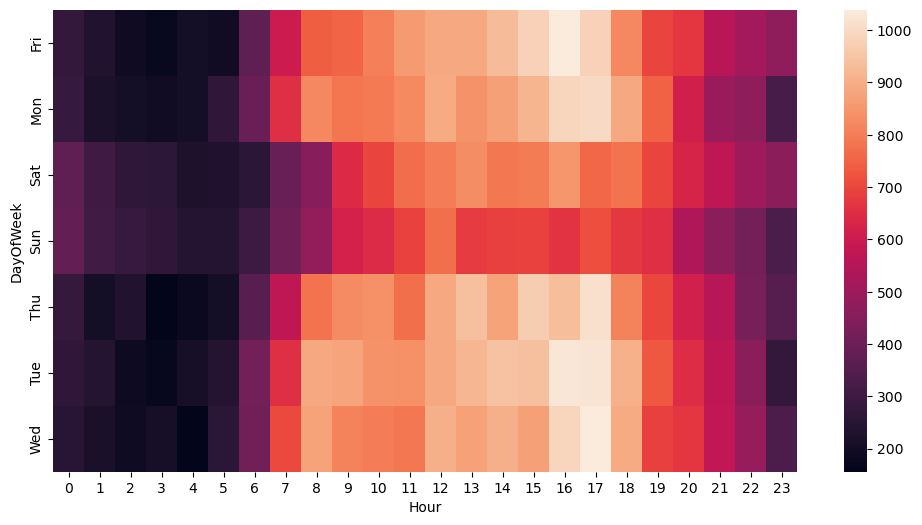

In [91]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour)

<Axes: xlabel='Hour', ylabel='DayOfWeek'>

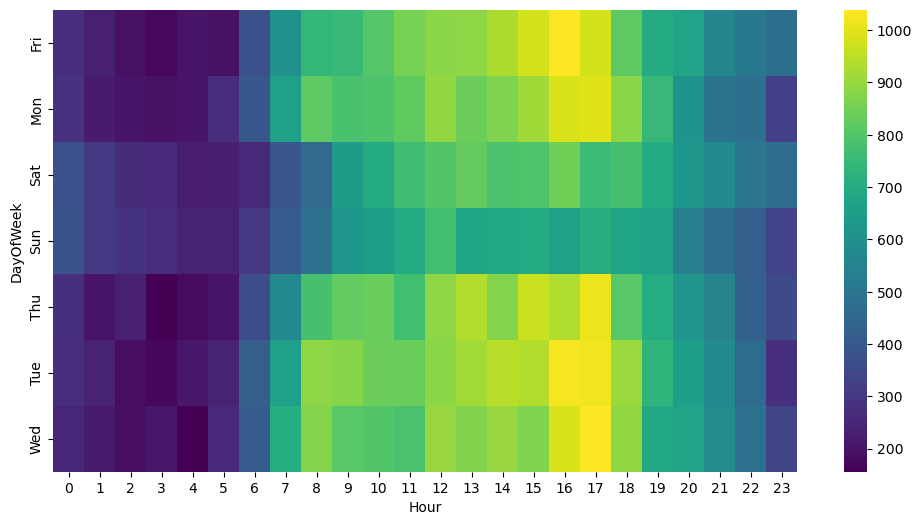

In [90]:
plt.figure(figsize=(12,6))
sns.heatmap(dayHour, cmap='viridis')

#### Now create a clustermap using this DataFrame

<Figure size 1200x600 with 0 Axes>

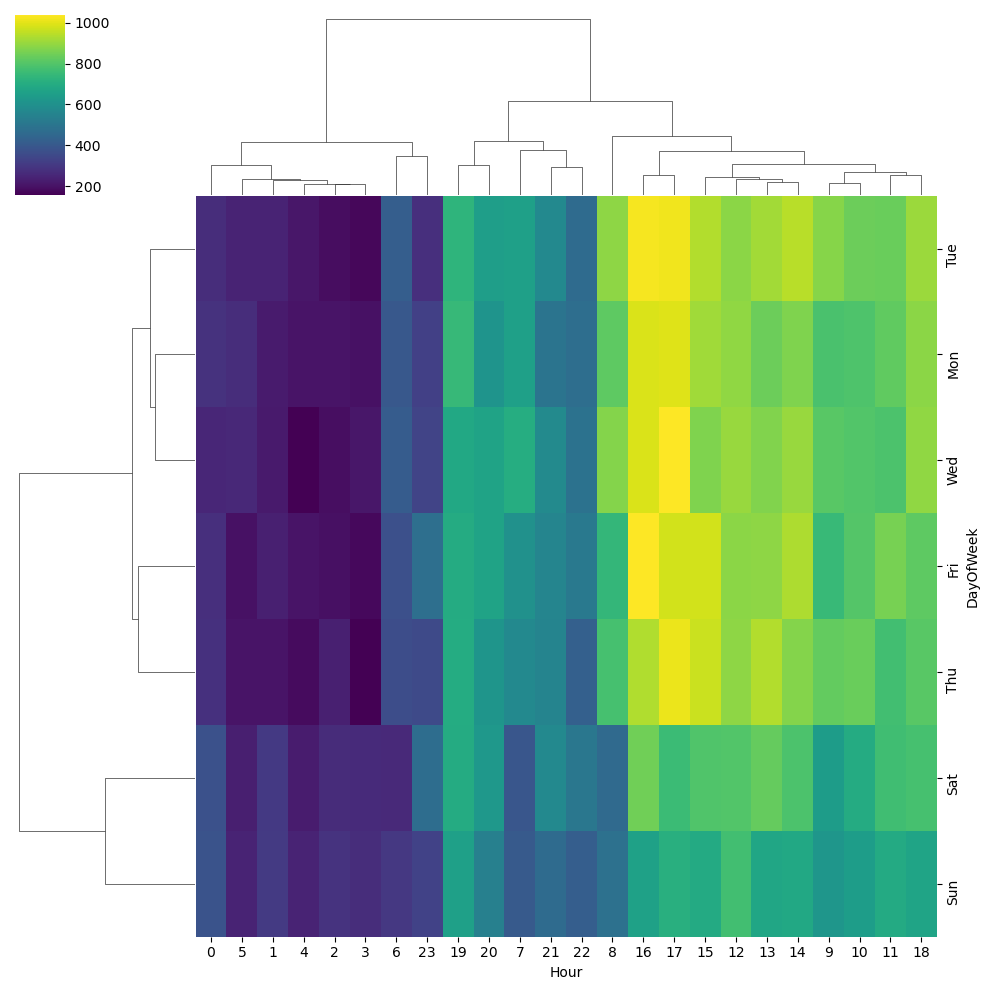

In [93]:
plt.figure(figsize=(12,6))
sns.clustermap(dayHour, cmap='viridis')

#### Now repeat these same plots and operations, for a DataFrame that shows the Month as a column.

In [95]:
dayMonth = data.groupby(by=['DayOfWeek','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


<Axes: xlabel='Month', ylabel='DayOfWeek'>

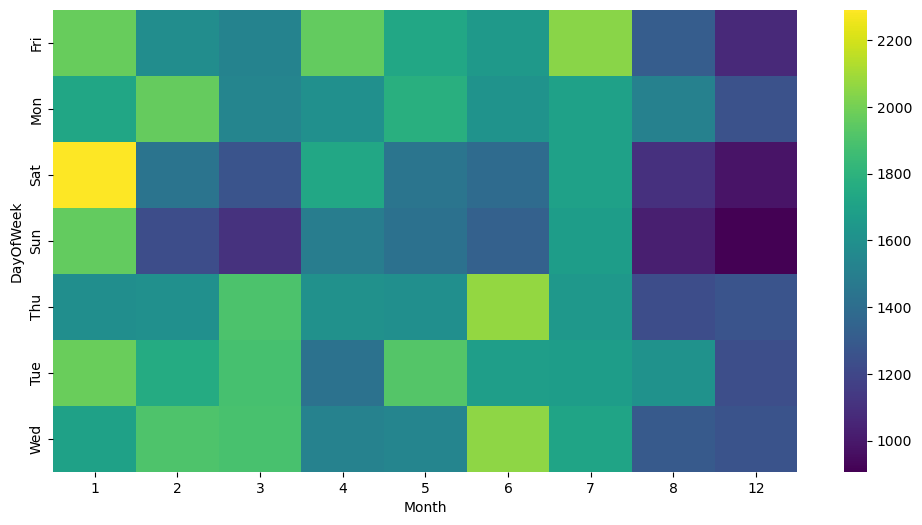

In [96]:
plt.figure(figsize=(12,6))
sns.heatmap(dayMonth, cmap='viridis')

<Figure size 1200x600 with 0 Axes>

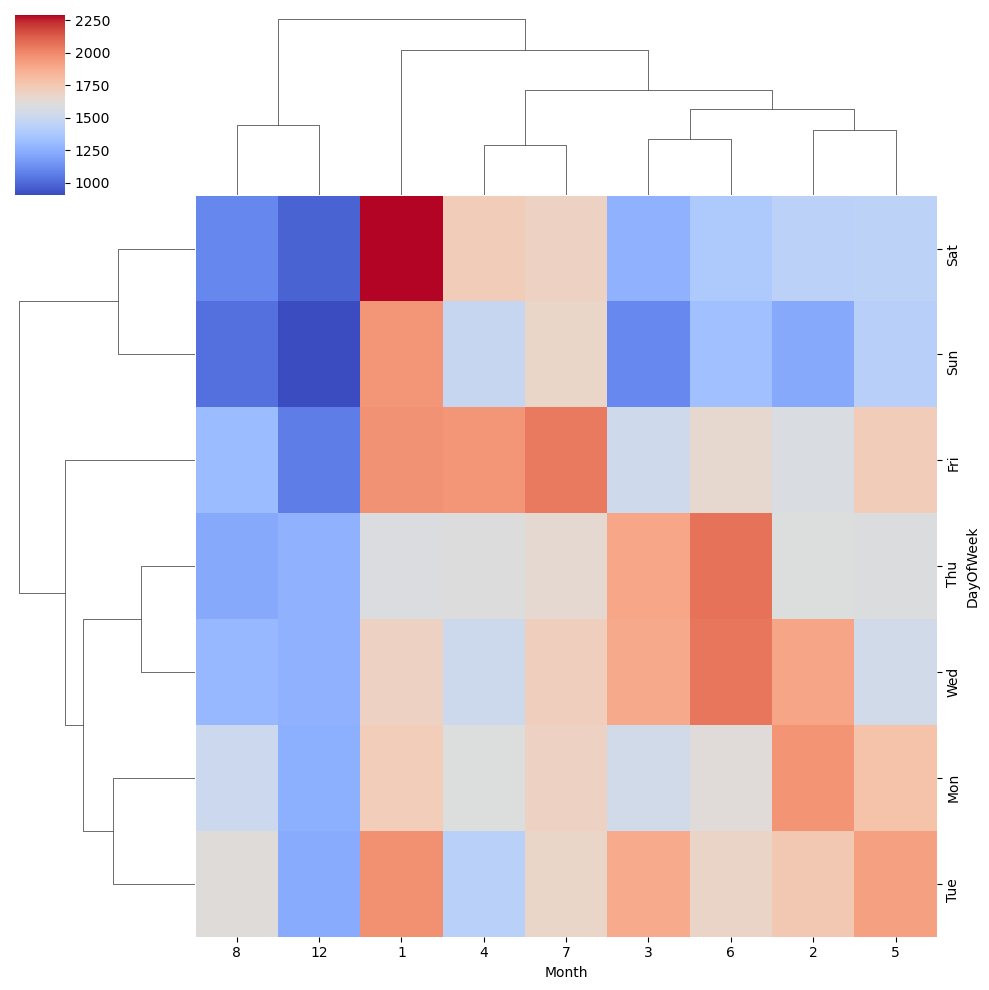

In [98]:
plt.figure(figsize=(12,6))
sns.clustermap(dayMonth, cmap='coolwarm')